# Connect to G-Drive

## Change Notebook Default Directory

# Import Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<ipython-input-142-21f15e5228a1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
csv_filename = "/content/drive/MyDrive/Project 1 Data set/[Complete]Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DataFrame's Info

In [ ]:
# DataFrame shape
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observations:

*   in that data i have detected 2 float 1 int and 10 object
*   total amount of data 1303 rows and 13 columns
*   In the data above, no Null/NaN was found





## Describe Dataframe

In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Using the '**describe**' method of the dataframe, we can get some first insights on the numerical columns.

Observations:

-The 'Inches' column, representing laptop screen sizes, has a mean of approximately 15.02 inches, with a standard deviation of around 1.43 inches.
-For 'Price_euros,' the average price is approximately 1123.69 euros, with a standard deviation of about 699.01 euros. The minimum and maximum prices are 174 euros and 6099 euros, respectively.
-The data also includes percentiles, such as the median ('laptop_ID': 659, 'Inches': 15.6, 'Price_euros': 977), providing insights into the distribution of these numerical features.

# Data Cleaning

## Lowering DataFrame's Column Names

In [ ]:
df.columns = df.columns.str.lower()
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
missing_values = df.isnull().sum()
missing_values

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

## Check Missing Values

In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

## Check For Duplicates

In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
df.laptop_id.unique()

array([   1,    2,    3, ..., 1318, 1319, 1320])

# Data Cleaning + Feature Engineering (FE)

## Laptop ID

In [ ]:
laptop_id_missing_values = df['laptop_id'].isnull().sum()
laptop_id_missing_values

0

In [ ]:
laptop_id_duplicate_values = df['laptop_id'].duplicated().sum()
laptop_id_duplicate_values

0

In [ ]:
laptop_id_data_type = df['laptop_id'].dtype
laptop_id_data_type

dtype('int64')

In [ ]:
# Check unique values of 'laptop_id'
df.laptop_id.unique()

array([   1,    2,    3, ..., 1318, 1319, 1320])

# Laptop ID Feature Engineering (FE)

In [ ]:
df.set_index('laptop_id', inplace=True)

## Screen Resolution

In [ ]:
screenresolution_missing_values = df['screenresolution'].isnull().sum()
screenresolution_missing_values

0

In [ ]:
screenresolution_duplicate_values = df['screenresolution'].duplicated().sum()
screenresolution_duplicate_values

1263

In [ ]:
screenresolution_data_type = df['screenresolution'].dtype
screenresolution_data_type

dtype('O')

### FE on Screen Resolution

In [ ]:
df['screen_type'] = df['screenresolution'].str.extract(r'([a-zA-Z\s]+\s)')
df['resolution_widht'] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')[0].str.strip().astype('int64')
df['resolution_height'] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')[1].str.strip().astype('int64')
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height
laptop_id,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,NaN,1440,900
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600


In [ ]:
df['screen_type'].isnull().sum(), df['resolution_widht'].isnull().sum(), df['resolution_height'].isnull().sum()

(314, 0, 0)

In [ ]:
df['screen_type'] = df['screen_type'].fillna('unknown')
df.head(5)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height
laptop_id,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600


In [ ]:
df['touchscreen'] = np.where(df['screenresolution'].str.contains('touchscreen'), 1, 0)
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen
laptop_id,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1303 non-null   object 
 1   product            1303 non-null   object 
 2   typename           1303 non-null   object 
 3   inches             1303 non-null   float64
 4   screenresolution   1303 non-null   object 
 5   cpu                1303 non-null   object 
 6   ram                1303 non-null   object 
 7   memory             1303 non-null   object 
 8   gpu                1303 non-null   object 
 9   opsys              1303 non-null   object 
 10  weight             1303 non-null   object 
 11  price_euros        1303 non-null   float64
 12  screen_type        1303 non-null   object 
 13  resolution_widht   1303 non-null   int64  
 14  resolution_height  1303 non-null   int64  
 15  touchscreen        1303 non-null   int64  
dtypes: float64(2), int64(3),

In [ ]:
sum(df['touchscreen'] == 1)

0

In [ ]:
#clean data
df['screen_high_end'] = (
    (df['screen_type'].str.contains('ips', case=False)) |
    (df['resolution_widht'] >= 2560) |
    (df['resolution_height'] >= 1600) |
    (df['touchscreen'] == 1)
)
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end
laptop_id,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD,1920,1080,0,True
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad,3200,1800,0,True
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,unknown,1366,768,0,False


### CPU Cleaning Data

In [ ]:
# Check for missing values in 'cpu'
missing_values_in_cpu = df['cpu'].isnull().sum()
missing_values_in_cpu

0

In [ ]:
# Check for duplicates in 'cpu'
duplicates_in_cpu = df['cpu'].duplicated().sum()
duplicates_in_cpu

1185

In [ ]:
# Check data type of 'cpu'
data_type_of_cpu = df['cpu'].dtype
data_type_of_cpu

dtype('O')

In [ ]:
# Check unique values of 'cpu'
df.cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

### CPU FE

In [ ]:
# Extract CPU manufacturer and model
df['cpu_manufacturer'] = df['cpu'].str.split(n=1).str[0]
df['cpu_model_with_clock'] = df['cpu'].str.split(n=1).str[1]

# Remove clock speed from the model
df['cpu_model'] = df['cpu_model_with_clock'].str.replace(r'\d+\.*\d*GHz', '').str.strip()

# Drop intermediate columns
df = df.drop(columns=['cpu_model_with_clock'])
df

<ipython-input-172-8dcec98065a9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cpu_model'] = df['cpu_model_with_clock'].str.replace(r'\d+\.*\d*GHz', '').str.strip()


,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model
laptop_id,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,Intel,Core i5
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD,1920,1080,0,True,Intel,Core i7 6500U
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad,3200,1800,0,True,Intel,Core i7 6500U
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,unknown,1366,768,0,False,Intel,Celeron Dual Core N3050


In [ ]:
# Extract CPU clock speed in GHz
df['cpu_clock_speed_GHz'] = df['cpu'].str.extract(r'(\d+\.*\d*)GHz').astype(float)

# Convert clock speed to numeric
df['cpu_clock_speed_GHz'] = pd.to_numeric(df['cpu_clock_speed_GHz'], errors='coerce')

df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz
laptop_id,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,2.3
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,Intel,Core i5,1.8
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U,2.5
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7,2.7
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,3.1


In [ ]:
# Dropping the original 'cpu' column
df = df.drop(columns=['cpu'])
df.head()

,company,product,typename,inches,screenresolution,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz
laptop_id,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,2.3
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,Intel,Core i5,1.8
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U,2.5
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7,2.7
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,3.1


### RAM Data Cleaning

In [ ]:
# Check for missing values in 'ram'
missing_values_in_ram = df['ram'].isnull().sum()
missing_values_in_ram

0

In [ ]:
# Check for duplicates in 'ram'
duplicates_in_ram = df['ram'].duplicated().sum()
duplicates_in_ram

1294

In [ ]:
# Check data type of 'ram'
data_type_of_ram = df['ram'].dtype
data_type_of_ram

dtype('O')

In [ ]:
# Check unique values of 'ram'
df.ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

### RAM FE

In [ ]:
# Change the RAM data type to float
df['ram_gb'] = df['ram'].str.extract('(\d+\.*\d*)').astype(float)
df.head()

,company,product,typename,inches,screenresolution,ram,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb
laptop_id,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,2.3,8.0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,Intel,Core i5,1.8,8.0
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U,2.5,8.0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7,2.7,16.0
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,3.1,8.0


In [ ]:
# Dropping the original 'ram' column
df = df.drop(columns=['ram'])
df.head()

,company,product,typename,inches,screenresolution,memory,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb
laptop_id,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,2.3,8.0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,Intel,Core i5,1.8,8.0
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U,2.5,8.0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7,2.7,16.0
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,3.1,8.0


## Memory (Drive) Data Cleaning

In [ ]:
# Check for missing values in 'memory'
missing_values_in_memory = df['memory'].isnull().sum()
missing_values_in_memory

0

In [ ]:
# Check for duplicates in 'memory'
duplicates_in_memory = df['memory'].duplicated().sum()
duplicates_in_memory

1264

In [ ]:
# Check data type of 'memory'
data_type_of_memory = df['memory'].dtype
data_type_of_memory

dtype('O')

In [ ]:
# Check unique values of 'memory'
df.memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

## Memory (Drive) Data FE

In [ ]:
# Create a new column 'storage_capacity' and convert it to integer data type
df['storage_capacity'] = df['memory'].str.extract(r'(\d+\.*\d*)\s*(GB|TB)')[0]
df['storage_capacity'] = df['storage_capacity'].astype('float')

# Create a new column 'storage_capacity_unit'
df['storage_capacity_unit'] = df['memory'].str.extract(r'(\d+\.*\d*)\s*(GB|TB)')[1]

# Convert 'TB' to 'GB' for uniformity
df['storage_capacity'] = np.where(df['storage_capacity_unit'] == 'TB', df['storage_capacity'] * 1024, df['storage_capacity'])

# Create a new column 'storage_type'
df['storage_type'] = df['memory'].str.extract(r'\b(HDD|SSD|Hybrid|Flash Storage)\b')

# Dropping the 'storage_capacity_unit' column
df = df.drop(columns=['storage_capacity_unit'])

# Rename 'storage_capacity' column to 'storage_gb' and convert it to integer data type
df.rename(columns={'storage_capacity': 'storage_gb'}, inplace=True)

df

,company,product,typename,inches,screenresolution,memory,gpu,opsys,weight,price_euros,...,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,2560,1600,0,True,Intel,Core i5,2.3,8.0,128.0,SSD
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,1440,900,0,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,1920,1080,0,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,2880,1800,0,True,Intel,Core i7,2.7,16.0,512.0,SSD
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,2560,1600,0,True,Intel,Core i5,3.1,8.0,256.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,1920,1080,0,True,Intel,Core i7 6500U,2.5,4.0,128.0,SSD
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,3200,1800,0,True,Intel,Core i7 6500U,2.5,16.0,512.0,SSD
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,1366,768,0,False,Intel,Celeron Dual Core N3050,1.6,2.0,64.0,Flash Storage


In [ ]:
# Check data type of 'storage_gb'
data_type_of_storage_gb = df['storage_gb'].dtype
data_type_of_storage_gb

dtype('float64')

In [ ]:
# Dropping the original 'memory' column
df = df.drop(columns=['memory'])
df.head()

,company,product,typename,inches,screenresolution,gpu,opsys,weight,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type
laptop_id,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,2.3,8.0,128.0,SSD
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,1440,900,0,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7,2.7,16.0,512.0,SSD
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,3.1,8.0,256.0,SSD


## Weight Data Cleaning

In [ ]:
# Check for missing values in 'weight'
missing_values_in_weight = df['weight'].isnull().sum()
missing_values_in_weight

0

In [ ]:
# Check for duplicates in 'weight'
duplicates_in_weight = df['weight'].duplicated().sum()
duplicates_in_weight

1124

In [ ]:
# Check data type of 'weight'
data_type_of_weight = df['weight'].dtype
data_type_of_weight

dtype('O')

In [ ]:
# Check unique values of 'weight'
df.weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

## Weight Data CFE

In [ ]:
# Create a new column 'weight_kg' and convert it to float type
df['weight_kg'] = df['weight'].str.extract(r'(\d+\.*\d*)\s*(kg)')[0]
df['weight_kg'] = df['weight_kg'].astype('float')

df.head()

,company,product,typename,inches,screenresolution,gpu,opsys,weight,price_euros,screen_type,...,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type,weight_kg
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,...,1600,0,True,Intel,Core i5,2.3,8.0,128.0,SSD,1.37
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel HD Graphics 6000,macOS,1.34kg,898.94,unknown,...,900,0,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage,1.34
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,...,1080,0,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,1.86
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,...,1800,0,True,Intel,Core i7,2.7,16.0,512.0,SSD,1.83
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,...,1600,0,True,Intel,Core i5,3.1,8.0,256.0,SSD,1.37


In [ ]:
# Check data type of 'weight_kg'
data_type_of_weight_kg = df['weight_kg'].dtype
data_type_of_weight_kg

dtype('float64')

In [ ]:
# Dropping the original 'weight' column
df = df.drop(columns=['weight'])
df.head()

,company,product,typename,inches,screenresolution,gpu,opsys,price_euros,screen_type,resolution_widht,resolution_height,touchscreen,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type,weight_kg
laptop_id,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 640,macOS,1339.69,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,2.3,8.0,128.0,SSD,1.37
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel HD Graphics 6000,macOS,898.94,unknown,1440,900,0,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage,1.34
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel HD Graphics 620,No OS,575.00,Full HD,1920,1080,0,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,1.86
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,AMD Radeon Pro 455,macOS,2537.45,IPS Panel Retina Display,2880,1800,0,True,Intel,Core i7,2.7,16.0,512.0,SSD,1.83
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 650,macOS,1803.60,IPS Panel Retina Display,2560,1600,0,True,Intel,Core i5,3.1,8.0,256.0,SSD,1.37


## GPU Data Cleaning





In [ ]:
# Check for missing values in 'gpu'
missing_values_in_gpu = df['gpu'].isnull().sum()
missing_values_in_gpu

0

In [ ]:
# Check for duplicates in 'gpu'
duplicates_in_gpu = df['gpu'].duplicated().sum()
duplicates_in_gpu

1193

In [ ]:
# Check data type of 'gpu'
data_type_of_gpu = df['gpu'].dtype
data_type_of_gpu

dtype('O')

In [ ]:
# Check unique values of 'gpu'
df.gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

## GPU Data FE

In [ ]:
# Create a new column 'gpu_brand'
df['gpu_brand'] = df['gpu'].str.extract(r'([a-zA-Z\s]+)((\d+\.*\d*)\s*)')[0]

# Create a new column 'gpu_model' and convert it to integer data type
df['gpu_model'] = df['gpu'].str.extract(r'([a-zA-Z\s]+)((\d+\.*\d*)\s*)')[1]
df['gpu_model'] = df['gpu_model'].astype('Int64')

df.head()

,company,product,typename,inches,screenresolution,gpu,opsys,price_euros,screen_type,resolution_widht,...,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type,weight_kg,gpu_brand,gpu_model
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 640,macOS,1339.69,IPS Panel Retina Display,2560,...,True,Intel,Core i5,2.3,8.0,128.0,SSD,1.37,Intel Iris Plus Graphics,640
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel HD Graphics 6000,macOS,898.94,unknown,1440,...,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage,1.34,Intel HD Graphics,6000
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel HD Graphics 620,No OS,575.00,Full HD,1920,...,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,1.86,Intel HD Graphics,620
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,AMD Radeon Pro 455,macOS,2537.45,IPS Panel Retina Display,2880,...,True,Intel,Core i7,2.7,16.0,512.0,SSD,1.83,AMD Radeon Pro,455
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 650,macOS,1803.60,IPS Panel Retina Display,2560,...,True,Intel,Core i5,3.1,8.0,256.0,SSD,1.37,Intel Iris Plus Graphics,650


In [ ]:
# Check data type of 'gpu_model'
data_type_of_gpu_model = df['gpu_model'].dtype
data_type_of_gpu_model

Int64Dtype()

In [ ]:
# Dropping the original 'gpu' column
df = df.drop(columns=['gpu'])
df.head()

,company,product,typename,inches,screenresolution,opsys,price_euros,screen_type,resolution_widht,resolution_height,...,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type,weight_kg,gpu_brand,gpu_model
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,macOS,1339.69,IPS Panel Retina Display,2560,1600,...,True,Intel,Core i5,2.3,8.0,128.0,SSD,1.37,Intel Iris Plus Graphics,640
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,macOS,898.94,unknown,1440,900,...,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage,1.34,Intel HD Graphics,6000
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,No OS,575.00,Full HD,1920,1080,...,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,1.86,Intel HD Graphics,620
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,macOS,2537.45,IPS Panel Retina Display,2880,1800,...,True,Intel,Core i7,2.7,16.0,512.0,SSD,1.83,AMD Radeon Pro,455
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,macOS,1803.60,IPS Panel Retina Display,2560,1600,...,True,Intel,Core i5,3.1,8.0,256.0,SSD,1.37,Intel Iris Plus Graphics,650


Now the dataset looks clean and ready to be explored

In [ ]:
df.to_csv('[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [ ]:
# Load cleaned dataset
csv_cleanfilename = "/content/[Cleaned]Laptop_Price.csv"
df_cleaned = pd.read_csv(csv_cleanfilename)

df_cleaned.head()


,company,product,typename,inches,screenresolution,opsys,price_euros,screen_type,resolution_widht,resolution_height,...,screen_high_end,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_gb,storage_type,weight_kg,gpu_brand,gpu_model
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,macOS,1339.69,IPS Panel Retina Display,2560,1600,...,True,Intel,Core i5,2.3,8.0,128.0,SSD,1.37,Intel Iris Plus Graphics,640.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,macOS,898.94,unknown,1440,900,...,False,Intel,Core i5,1.8,8.0,128.0,Flash Storage,1.34,Intel HD Graphics,6000.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,No OS,575.00,Full HD,1920,1080,...,False,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,1.86,Intel HD Graphics,620.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,macOS,2537.45,IPS Panel Retina Display,2880,1800,...,True,Intel,Core i7,2.7,16.0,512.0,SSD,1.83,AMD Radeon Pro,455.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,macOS,1803.60,IPS Panel Retina Display,2560,1600,...,True,Intel,Core i5,3.1,8.0,256.0,SSD,1.37,Intel Iris Plus Graphics,650.0


In [ ]:
# Cleaned DataFrame shape
df_cleaned.shape

(1303, 21)

In [ ]:
# Cleaned DataFrame info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   screenresolution     1303 non-null   object 
 5   opsys                1303 non-null   object 
 6   price_euros          1303 non-null   float64
 7   screen_type          1303 non-null   object 
 8   resolution_widht     1303 non-null   int64  
 9   resolution_height    1303 non-null   int64  
 10  touchscreen          1303 non-null   int64  
 11  screen_high_end      1303 non-null   bool   
 12  cpu_manufacturer     1303 non-null   object 
 13  cpu_model            1303 non-null   object 
 14  cpu_clock_speed_GHz  1303 non-null   float64
 15  ram_gb               1303 non-null   f

In [ ]:
# Describe cleaned DataFrame
df_cleaned.describe()

,inches,price_euros,resolution_widht,resolution_height,touchscreen,cpu_clock_speed_GHz,ram_gb,storage_gb,weight_kg,gpu_model
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1273.000000
mean,15.017191,1123.686992,1894.784344,1070.830391,0.0,2.298772,8.382195,447.809670,2.038734,694.575805
std,1.426304,699.009043,494.641028,284.519410,0.0,0.506340,5.084665,366.037159,0.665475,563.087030
min,10.100000,174.000000,1366.000000,768.000000,0.0,0.900000,2.000000,8.000000,0.690000,2.000000
25%,14.000000,599.000000,1600.000000,900.000000,0.0,2.000000,4.000000,256.000000,1.500000,520.000000
50%,15.600000,977.000000,1920.000000,1080.000000,0.0,2.500000,8.000000,256.000000,2.040000,620.000000
75%,15.600000,1487.880000,1920.000000,1080.000000,0.0,2.700000,8.000000,512.000000,2.300000,940.000000
max,18.400000,6099.000000,3840.000000,2160.000000,0.0,3.600000,64.000000,2048.000000,4.700000,6150.000000


## Custom functions to improve plot readability

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

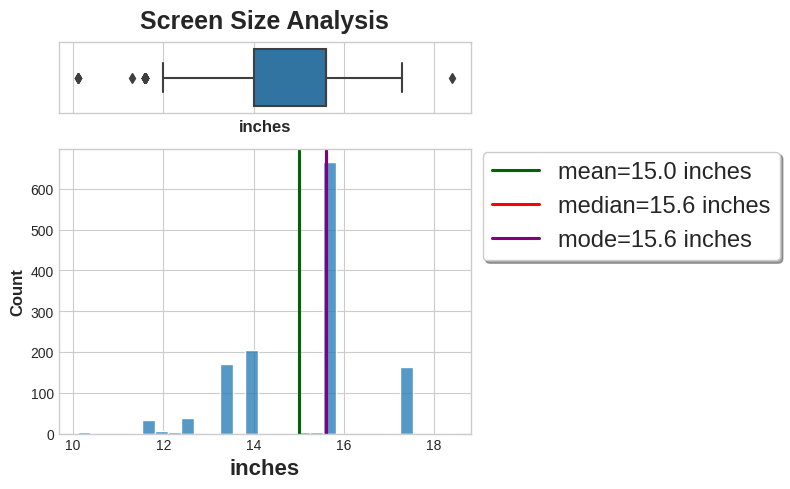

In [ ]:
num_plot(df_cleaned, 'inches', 'Screen Size Analysis', ' inches')

## Which brand is the most frequent in the dataframe?

In [ ]:
# Most frequent brand in cleaned DataFrame
brand_counts = df_cleaned['company'].value_counts()
brand_counts

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64

## What type of laptop is the most frequent?

So, the most frequent brands are Dell and Lenovo

In [ ]:
# Most frequent type of laptop in cleaned DataFrame
most_frequent_type = df_cleaned['typename'].value_counts().idxmax()
print(f"The most frequent type of laptop is: {most_frequent_type}")

The most frequent type of laptop is: Notebook


## Which size is the most popular?

In [ ]:
# Most popular size in cleaned DataFrame
most_popular_size = df_cleaned['inches'].value_counts().idxmax()
print(f"The most popular size is: {most_popular_size} inches")

The most popular size is: 15.6 inches


The most popular size is: 15.6 inches

## How is weight distributed among the laptops?

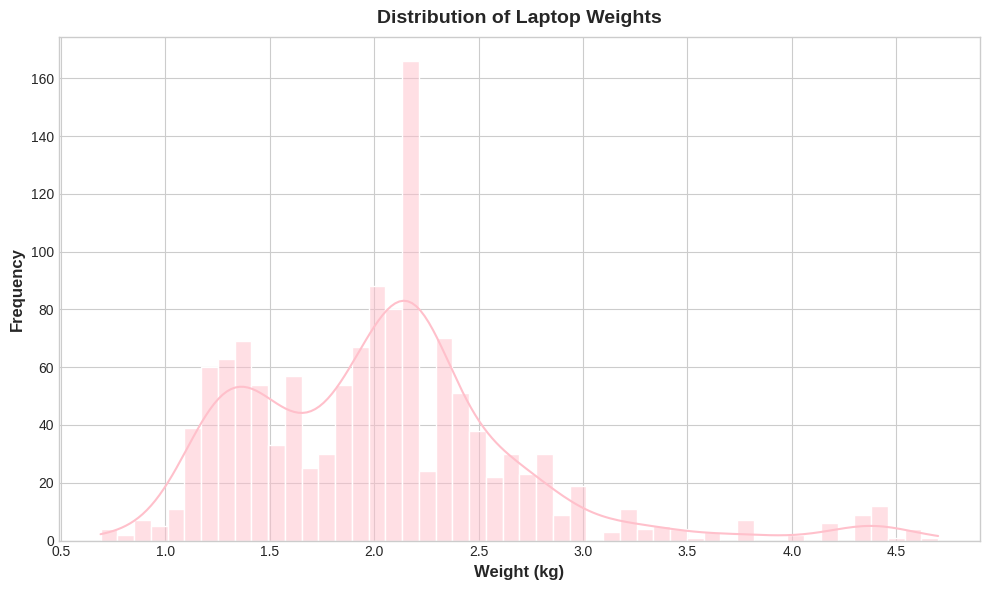

In [ ]:
def plot_weight_distribution(df_cleaned):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned['weight_kg'], bins=50, kde=True, color='pink')
    plt.title('Distribution of Laptop Weights')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    plt.show()
plot_weight_distribution(df_cleaned)

## How is price distributed among the laptops?

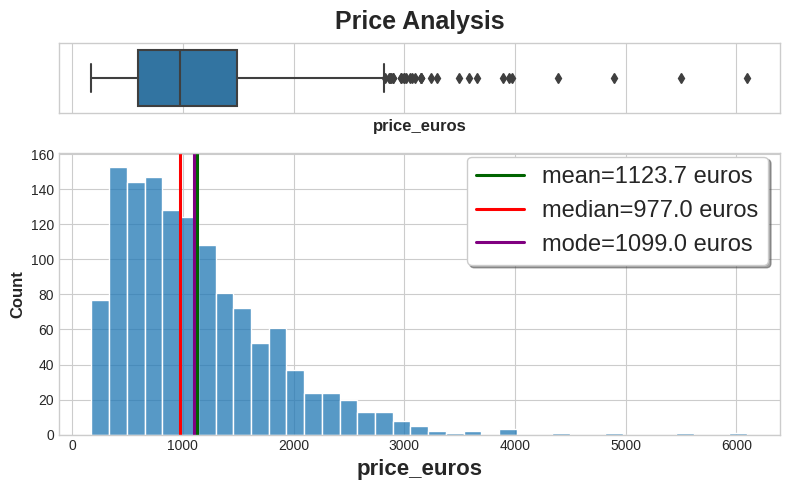

In [ ]:
num_plot(df_cleaned, 'price_euros', 'Price Analysis', ' euros')

## How is RAM distributed among the laptops?

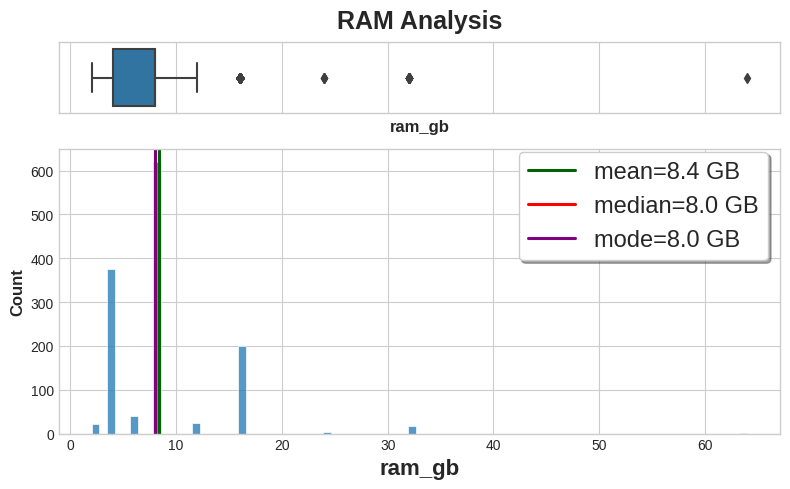

In [ ]:
num_plot(df_cleaned, 'ram_gb', 'RAM Analysis', ' GB')

## How is CPU frequency distributed among the laptops?

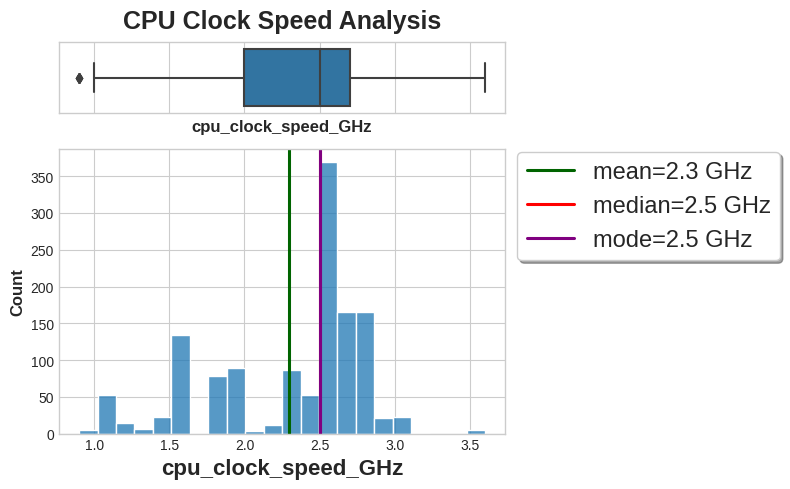

In [ ]:
num_plot(df_cleaned, 'cpu_clock_speed_GHz', 'CPU Clock Speed Analysis', ' GHz')

## How is Hard Drive capacity distributed among the laptops?

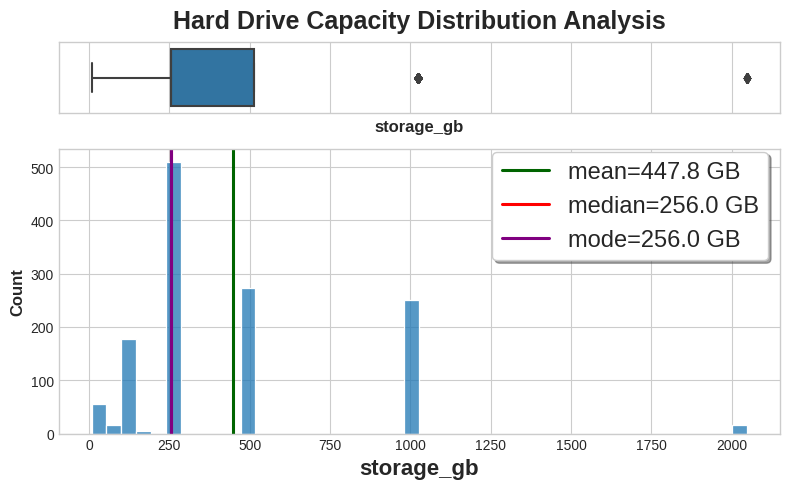

In [ ]:
num_plot(df_cleaned, 'storage_gb', 'Hard Drive Capacity Distribution Analysis', ' GB')

## Price VS CPU brand by GPU brand

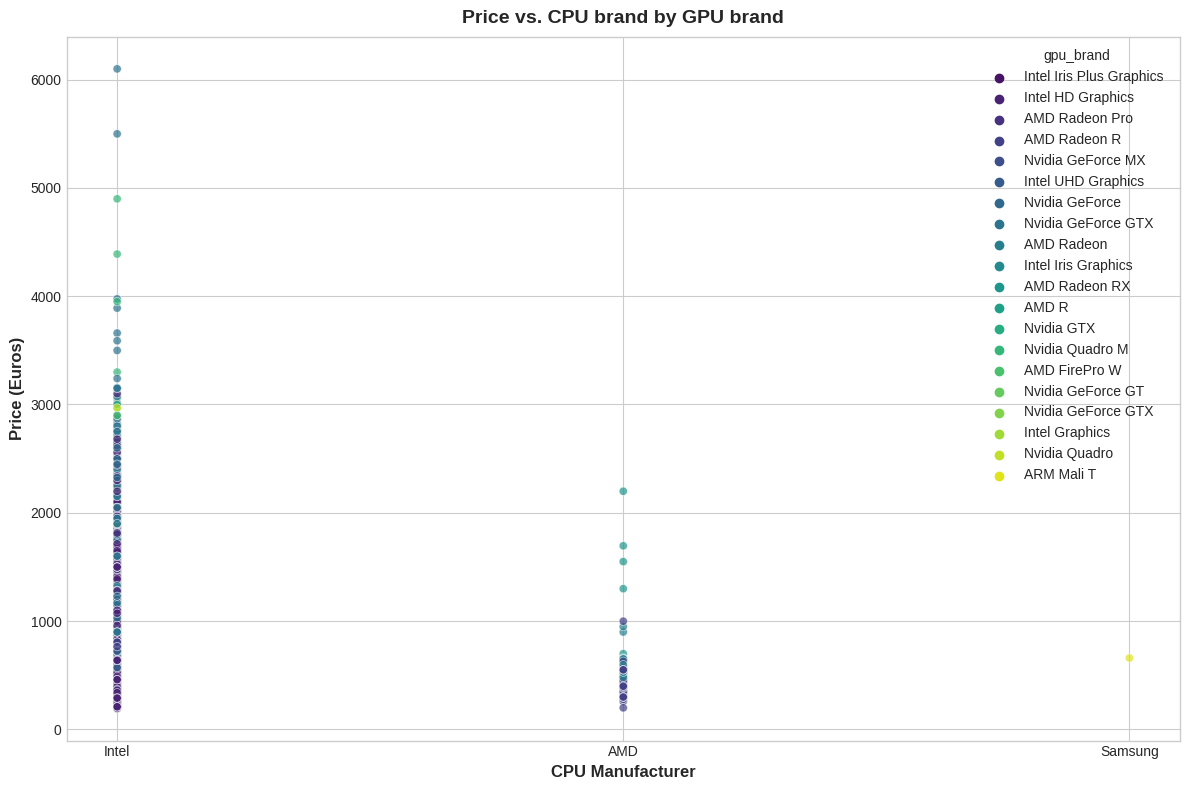

In [ ]:
# Scatter plot: Price vs. CPU brand, colored by GPU brand
plt.figure(figsize=(12, 8))
sns.scatterplot(x='cpu_manufacturer', y='price_euros', hue='gpu_brand', data=df_cleaned, palette='viridis', alpha=0.7)
plt.title('Price vs. CPU brand by GPU brand')
plt.xlabel('CPU Manufacturer')
plt.ylabel('Price (Euros)')
plt.show()

Insights from this plot:

From the calculation results, the 'Dell' brand appears most often in the dataframe with a frequency of 297.
* 'Notebook' type laptops dominate the number of entries in this dataframe.
*The most common screen size is 15.6 inches in this dataframe.
* A number of dataframes are outside the normal range of laptop distribution, especially in the weight parameter. The average weight of a laptop is 2 kilograms, the median is also 2 kilograms, and the most frequently occurring weight is 2.2 kilograms. The use of the additional parameter 'low_weight' indicates that most of the distribution of laptops weighs more than 2 kilograms, and this may influence users looking for lighter laptops.
* In price data, some entries are outside the normal range. The average laptop price was 1123.7 euros, the median was 977.0 euros, and the most frequently occurring price was 1099 euros. Correlation analysis of price with CPU, screen resolution, RAM, storage, weight, and GPU shows that the parameters that most influence price are dedicated GPU, quality and storage capacity, RAM, and CPU with the highest series. This is reflected in the graph with clear color differences, showing that the higher the parameter value, the higher the price of the laptop. The general laptop category still dominates, with several parameters taken from the latest CPU series, high screen resolution, large RAM, use of SSD, weight less than 2 kilograms, and use of dedicated or integrated GPU.
* The distribution of CPU speed data shows a mean of around 2.3 GHz, a median of 2.5 GHz, and the most frequently occurring speed is 2.5 GHz. There are also some outlier data in this distribution.
* Storage capacity distribution shows a mean of approximately 601.7 GB, a median of 500 GB, and the most frequently occurring storage capacity is 256 GB.

## Which are the TOP 15 most common GPUs?

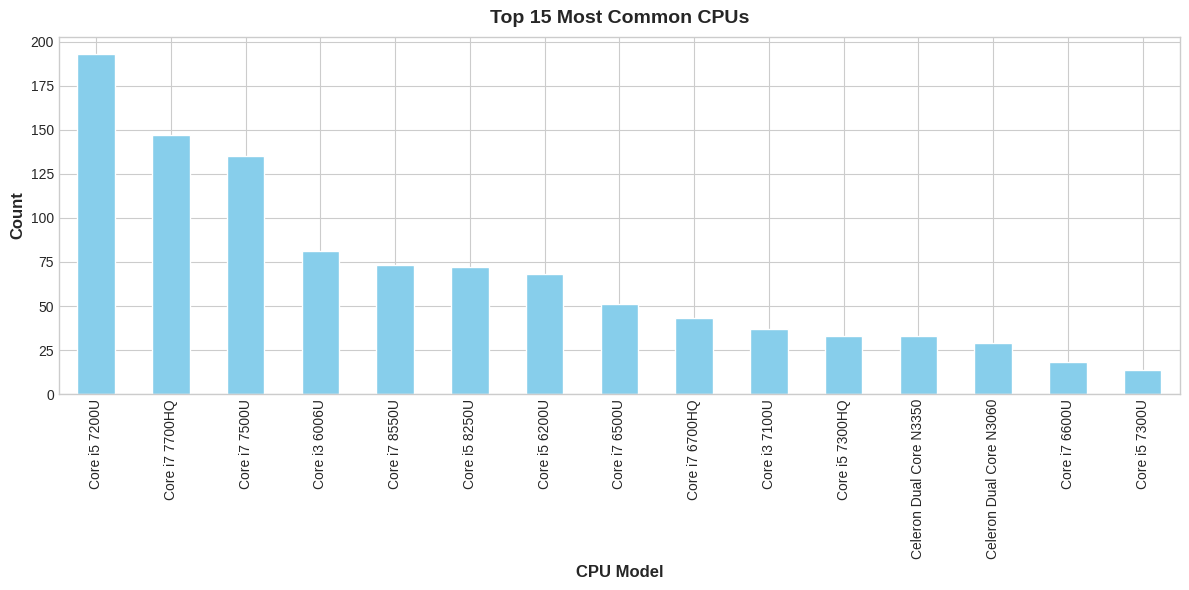

In [ ]:
top_cpus = df_cleaned['cpu_model'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_cpus.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Common CPUs')
plt.xlabel('CPU Model')
plt.ylabel('Count')
plt.show()

## Which are the TOP 15 most common CPUs?

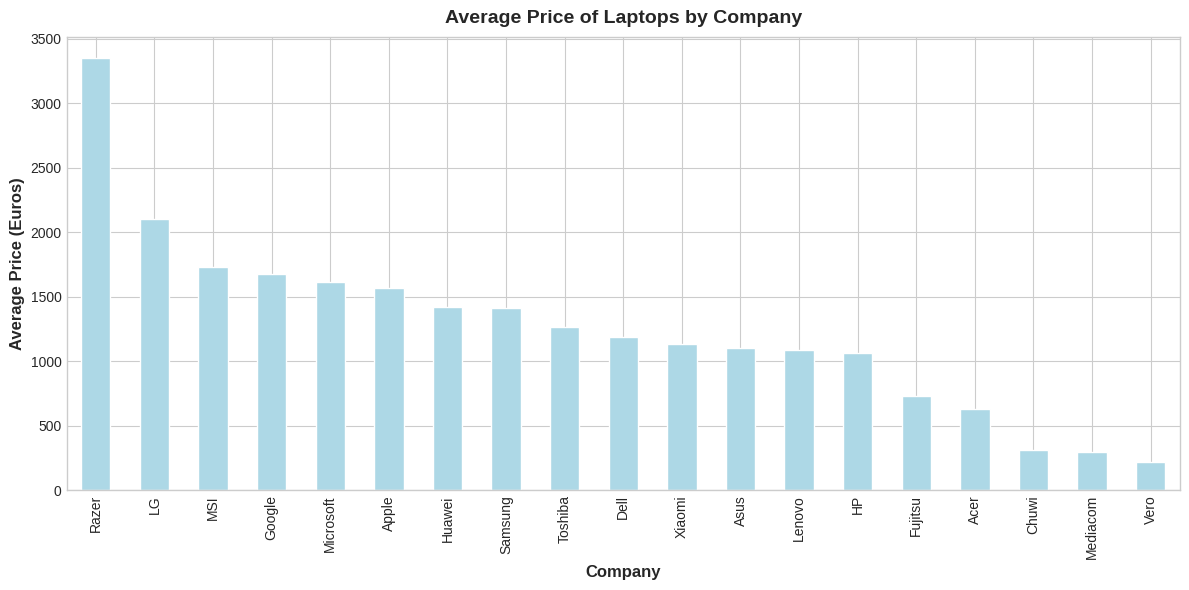

In [ ]:
# Group the data by the 'company' column and then calculate the mean price for each group
average_price_by_company = df_cleaned.groupby('company')['price_euros'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_price_by_company.plot(kind='bar', color='lightblue')
plt.title('Average Price of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.show()

## What is the average price of laptops by company?

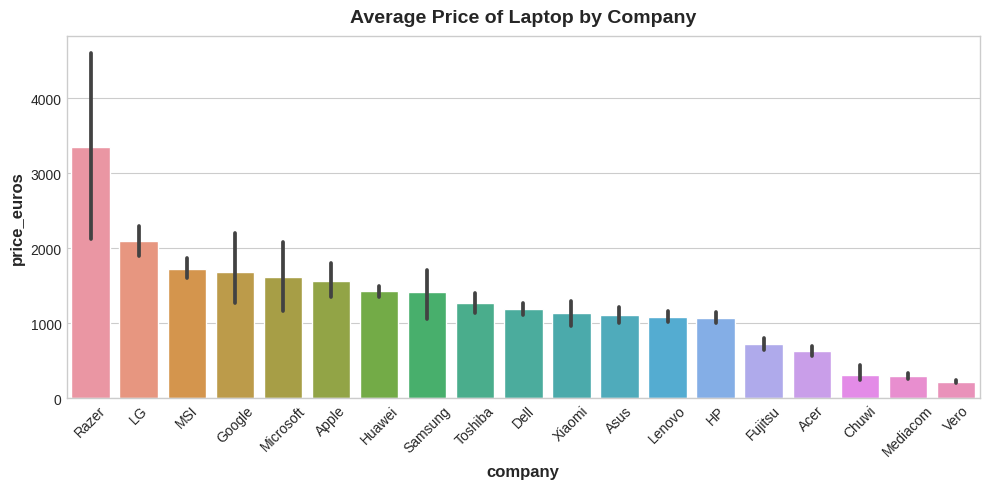

In [ ]:
avg_price = df.groupby('company')['price_euros'].mean().sort_values(ascending=False)
order_company = avg_price.index
plt.figure(figsize=(10, 5))
sns.barplot(x='company', y='price_euros', data=df, order=order_company)
plt.title('Average Price of Laptop by Company')
plt.xticks(rotation=45)
plt.show()

Insights:
* In the top 15 GPU category, the position is still occupied by the Intel HD Graphics series, namely the default GPU from Intel. Maybe this GPU has become popular because of its affordable price, unlike the Nvidia brand. Positions 1-3 are filled by Intel HD Graphics, followed by Nvidia with the high-performance GTX series.
* In the top 15 CPU category, Intel is far ahead compared to manufacturers AMD and ARM. The most popular CPU in the top 15 is still controlled by Intel, with the 7th generation Core i5 at the top. This CPU has an energy-friendly or U-type SKU with a clock speed of 2.5 GHz. In second place, there is the 7th generation Intel Core i7 using the HQ series SKU, which is very powerful for activities such as gaming, editing, and so on. Overall, Intel still dominates with its energy-friendly or U series SKUs.
* Average laptop prices by brand show that the Razer brand is ranked highest. Perhaps this high price is due to the great reputation and high specifications of the Razer brand. On the other hand, the Vero brand has the lowest average price, possibly because it is not well known, making its laptops more affordable. Samsung, Toshiba, Huawei and Dell brands occupy middle positions with average prices.